<a href="https://colab.research.google.com/github/Rishabh9559/Data_science/blob/main/Phase%202%3A%20Machine%20Learning%20for%20Data%20Science/Decision%20Tree%20/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Lower threshold (e.g., 0.2)
→ Model predicts positive more easily
* More True Positives
* More False Positives
* Fewer False Negatives

### Higher threshold (e.g., 0.8)
Model predicts positive only when very confident
* More True Negatives
* More False Negatives
* Fewer False Positives



Example :

Low threshold → Good for safety-critical tasks (don’t miss positives, like disease detection).

High threshold → Good for avoiding false alarms (spam detection, fraud alerts).

# Decision Tree

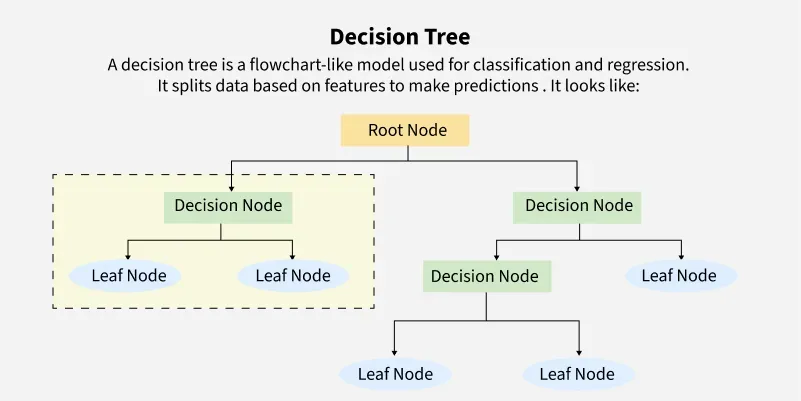


##  What is a Decision Tree?

A **Decision Tree** is a **supervised machine learning algorithm** used for both **classification** and **regression**.

* It works like a **flowchart**:

  * Each **internal node** → represents a condition (feature test).
  * Each **branch** → outcome of the condition.
  * Each **leaf node** → final prediction (class label or value).


##  Types of Decision Trees

1. **Classification Trees**

   * Target variable is **categorical** (Yes/No, Fraud/Not Fraud, Spam/Not Spam).
   * Example: Predict if a customer will buy a product (Yes/No).

2. **Regression Trees**

   * Target variable is **continuous** (numbers).
   * Example: Predict house price (\$250,000, \$500,000, etc.).

3. **Categorical Variable Decision Tree**

   * Handles categorical features (like Color = Red/Blue/Green).

4. **Continuous Variable Decision Tree**

   * Handles continuous features (like Age, Salary).



##  How It Works (Simple Example)

Imagine a bank wants to decide if they should **approve a loan**.
The decision tree might look like:

```
             [Income > 50K?]
                /       \
             Yes          No
            /              \
   [Credit Score > 700?]    Reject Loan
       /        \
     Yes         No
   Approve      Reject
```

* If Income > 50K and Credit Score > 700 → **Approve**
* Otherwise → **Reject**



##  Real-World Examples

1. **Healthcare** → Predict whether a patient has diabetes based on age, BMI, glucose levels.
2. **Finance** → Decide whether to approve/deny a loan or credit card.
3. **E-commerce** → Recommend products based on browsing & purchase history.
4. **Manufacturing** → Predict machine failure based on temperature, vibration, pressure.
5. **Education** → Predict whether a student will pass/fail based on study hours, attendance.



 **Why are Decision Trees popular?**

* Easy to visualize & interpret.
* Mimics human decision-making.
* Can be used as a base for **Random Forests** & **Gradient Boosted Trees**.






---

#  1. Information Gain (Entropy Based)

###  Entropy Formula

Entropy measures impurity or disorder:

$$
Entropy(S) = - \sum_{i=1}^{c} p_i \log_2(p_i)
$$

* $p_i$ = probability of class $i$

* $c$ = number of classes

* **Entropy = 0** → Pure (all samples same class)

* **Entropy = 1** → Maximum disorder (50/50 mix in binary)



###  Information Gain Formula

Measures reduction in entropy after splitting on a feature:

$$
IG(S, A) = Entropy(S) - \sum_{v \in Values(A)} \frac{|S_v|}{|S|} \cdot Entropy(S_v)
$$

* $S$ = dataset
* $A$ = feature
* $S_v$ = subset where feature $A = v$

The feature with the **highest Information Gain** is chosen.



###  Example (Information Gain)

Dataset: Predict if a person buys a computer.

| Student | Buys? |
| ------- | ----- |
| Yes     | Yes   |
| Yes     | Yes   |
| No      | No    |
| No      | No    |
| No      | Yes   |

* Total = 5 → (3 Yes, 2 No)
* Entropy(S) = $-\frac{3}{5}\log_2\frac{3}{5} - \frac{2}{5}\log_2\frac{2}{5}$
  \= 0.971

Split by **Student**:

* Student = Yes → {Yes, Yes} → Entropy = 0
* Student = No → {No, No, Yes} → Entropy = 0.918

Weighted entropy = (2/5 × 0) + (3/5 × 0.918) = 0.550

$$
IG = 0.971 - 0.550 = 0.421
$$

So, “Student” is a good feature to split.

## Range of Gain be -
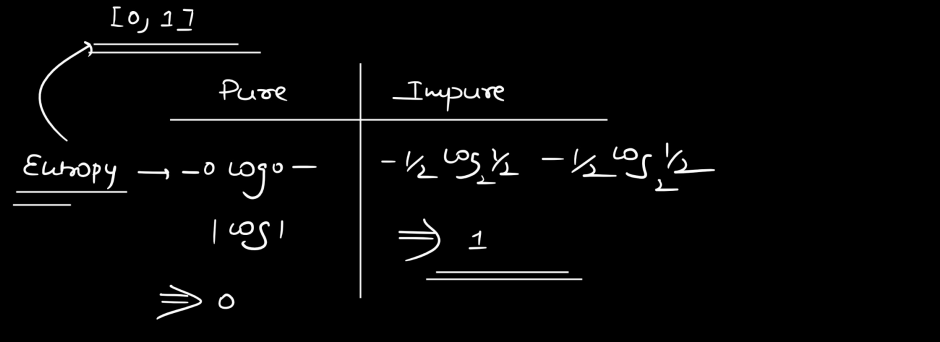

---

#  2. Gini Index

###  Formula

Measures impurity, simpler than entropy:

$$
Gini(S) = 1 - \sum_{i=1}^{c} p_i^2
$$

* $p_i$ = probability of class $i$

* **Gini = 0** → Pure node

* **Higher Gini** → More impurity



###  Example (Gini Index)

Same dataset (3 Yes, 2 No):

$$
Gini(S) = 1 - \Big(\left(\tfrac{3}{5}\right)^2 + \left(\tfrac{2}{5}\right)^2\Big)
= 1 - (0.36 + 0.16) = 0.48
$$

Split by **Student**:

* Student = Yes → {Yes, Yes} → Gini = 0
* Student = No → {No, No, Yes} → Gini = $1 - (2/3)^2 - (1/3)^2 = 0.444$

Weighted Gini = (2/5 × 0) + (3/5 × 0.444) = 0.266

So impurity reduced from 0.48 → 0.266.



 In practice:

* **Entropy/Info Gain** → good when you want **information-theoretic measure**
* **Gini Index** → faster, commonly used in **CART** ( Classification And Regression Tree )

---




#Example for Gini

## Default Gini is the criterion for computationally in Decision Tree

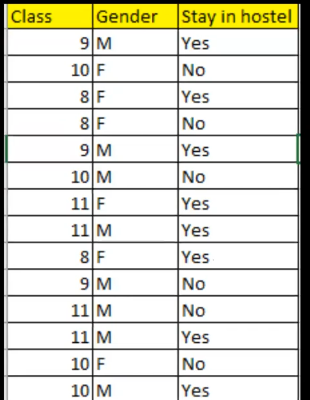

Total sampleod class be = 14

total class 8 student = 3

total class 9 student = 3

total class 10 student = 4

total class 11 student = 4



Gini(class)= { (total class 8 student/total sample class) * (Gini value od class 8) + ...... }

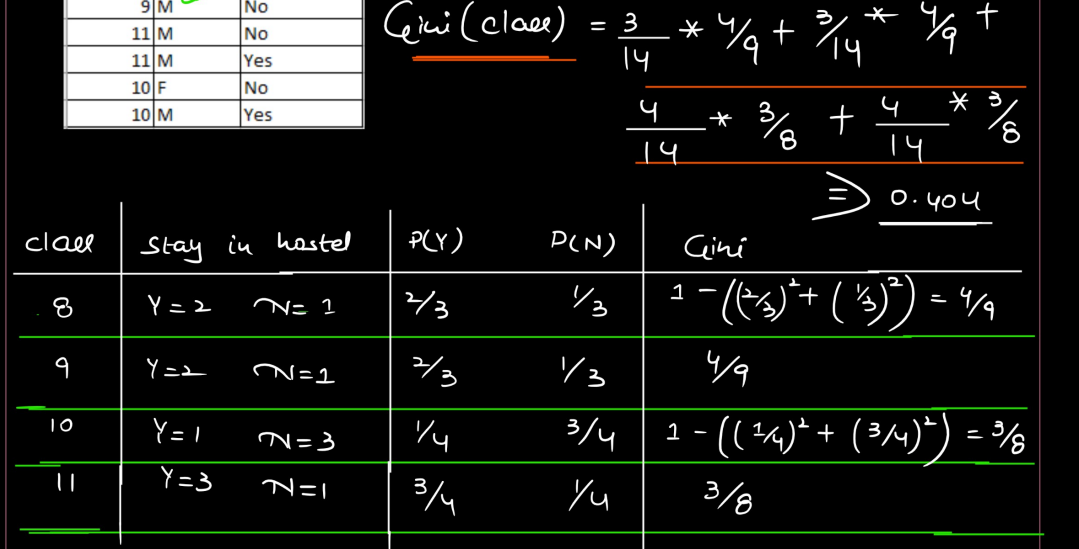

Total Gender sample = 14

Total male = 8

Total female= 6

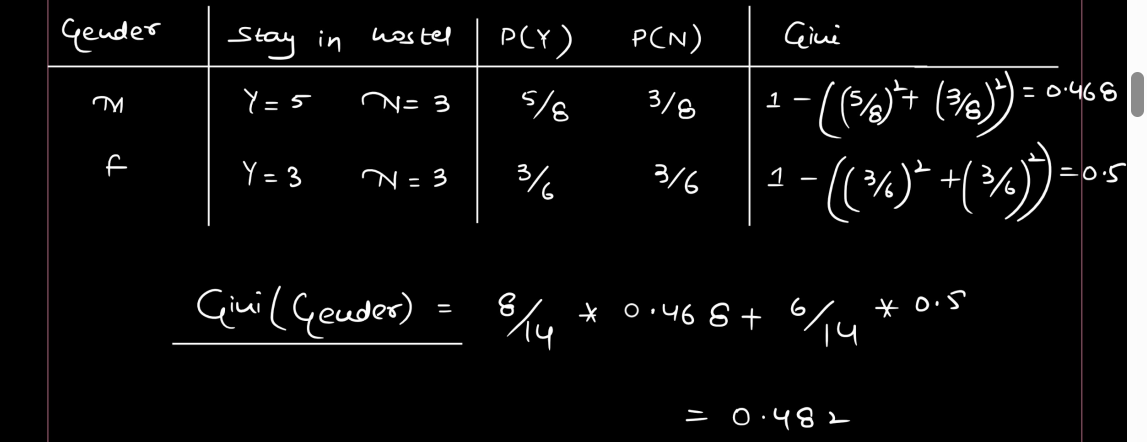

which one have less Gini value , we take that gini value.

Gini(class) = 0.404

Gini (gender) = 0.482

gini value of class be take . If gini value be less then more pure.

Gini range be 0 to 0.5

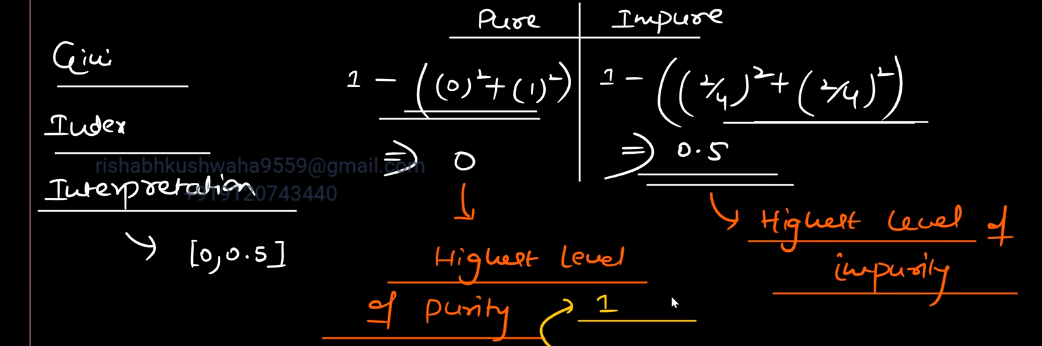

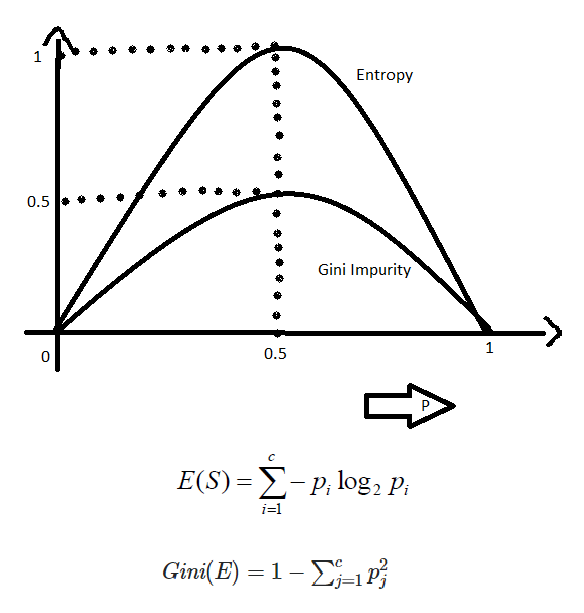


##  When to use **Entropy (Information Gain)**

We use **Entropy** when we want a **more accurate, information-theoretic measure** of impurity, especially when:

1. **Class distribution is very skewed (imbalanced data):**

   * Entropy penalizes impurity more strongly than Gini.
   * It’s better at handling datasets where one class dominates.

2. **When interpretability in terms of "information content" is needed:**

   * Entropy comes from **information theory**.
   * If you need to explain results in terms of **“information gain”** or **uncertainty reduction**, entropy is the natural choice.

3. **When precision in impurity measurement matters more than speed:**

   * Entropy uses logarithms → slower but gives slightly more refined splits.
   * If dataset is small/medium → entropy is fine.
   * If dataset is huge → Gini is faster.



##  Difference (Quick Recap)

* **Gini Index** → faster (just squares).
* **Entropy (Info Gain)** → slower, but stronger penalty for mixed classes.

Both usually give similar trees, but not always.



##  Real-World Applications of **Entropy**

1. **Medical Diagnosis Systems**

   * Example: Predicting if a patient has a disease (Yes/No).
   * Data may be imbalanced (few “Yes” cases vs many “No”).
   * Entropy ensures the model doesn’t miss rare but critical positive cases.

2. **Fraud Detection**

   * Fraud cases are much fewer than normal cases.
   * Entropy is better at catching these rare fraudulent cases by focusing on purity.

3. **Spam Filtering**

   * Emails are often 90% normal, 10% spam.
   * Entropy helps capture spam even if it’s a minority.

4. **Customer Churn Prediction**

   * Companies want to identify customers likely to leave (churn).
   * Churners are usually a small portion → entropy helps in not ignoring them.



###Population Decision Tree Types: ID3, C4.5, CART, Conditional Inference Trees.

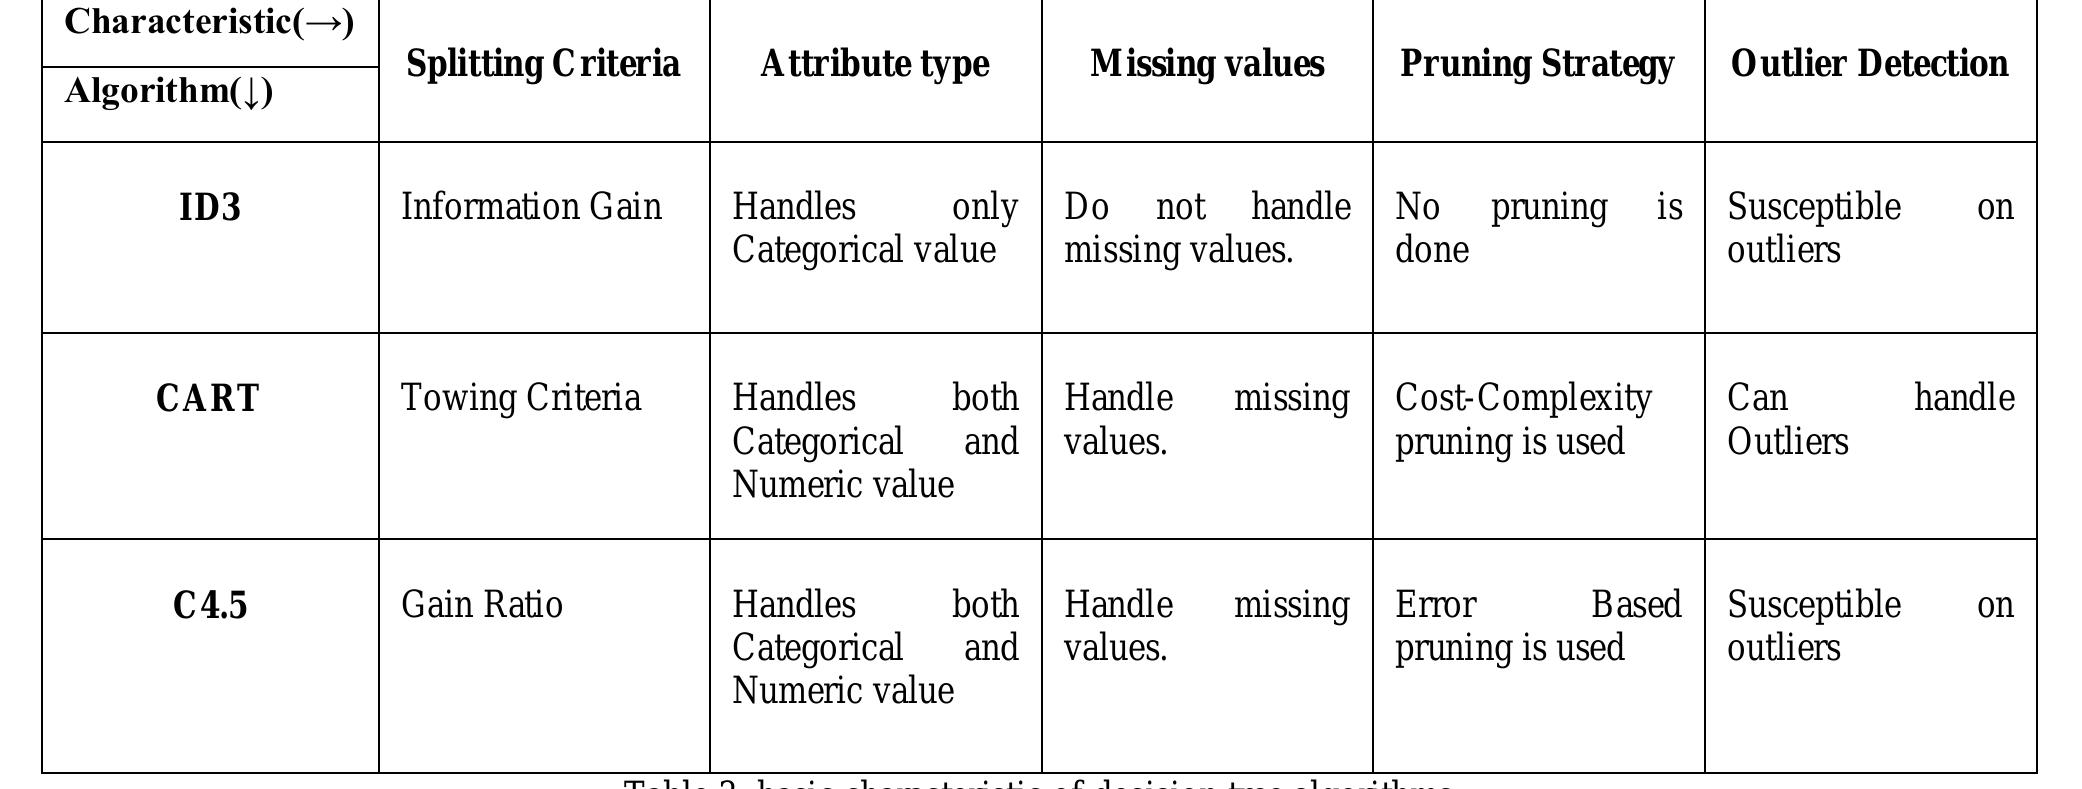


Types of Decision Tree Algorithms
1. ID3 (Iterative Dichotomiser 3)
Developed by: Ross Quinlan in 1986.

Splitting Criterion: Utilizes information gain (based on entropy) to select the best attribute at each node to maximize reduction in uncertainty.

Features: Only works with categorical attributes, does not include pruning (which can lead to overfitting).

Application: Mostly for classification tasks.

2. C4.5
Developed by: Ross Quinlan as an improvement upon ID3.

Splitting Criterion: Uses gain ratio, a modification of information gain that corrects for ID3’s bias toward attributes with many distinct values.

Features: Handles both continuous and categorical attributes, includes tree pruning, can handle missing values, generates rules from trees.

Application: Widely used for classification.

3. CART (Classification and Regression Trees)
Developed by: Breiman et al.

Splitting Criterion: For classification, uses Gini impurity; for regression, uses sum of squared errors.

Features: Can produce binary trees (every node splits two ways), handles both categorical and continuous variables, includes cost-complexity pruning.

Application: Used for both classification (discrete output) and regression (continuous output) tasks.

4. Conditional Inference Trees
Developed by: Hothorn, Hornik, and Zeileis.

Splitting Criterion: Uses statistical hypothesis testing (permutation test) to select the variable for splitting, instead of maximizing information gain.

Features: Avoids selection bias toward variables with many categories, uses p-values to guide splits, suitable for multivariate responses and continuous variables, handles correlations robustly.

Application: Useful for unbiased variable selection and in cases with correlated predictors

### Give me the idea about what is TP, TN, FP, FN in c?

* TP (True Positive): The model correctly predicts the positive class. For example, if testing for spam emails, a true positive means the email is actually spam and the model correctly labels it as spam.

* TN (True Negative): The model correctly predicts the negative class. Using the spam example, a true negative means the email is not spam and the model correctly labels it as not spam.

* FP (False Positive): The model incorrectly predicts the positive class. This is a "Type I error." For spam, it's an email that is actually not spam but the model mistakes it for spam.

* FN (False Negative): The model incorrectly predicts the negative class. This is a "Type II error." In spam context, a spam email gets classified as not spam, meaning the model missed it.